# Chapter 8 Recursion and Dynamic Programming

from Gayle Laakmann McDowell's "Cracking the Coding Interview", 6th ed.

Ron Wu

## 8.1 hop stairs with 3 possible hops 1, 2, 3 stairs at once

In [21]:
def numberPossibleHops(n):
    memo = {1:1, 2:2, 3:4}
    return _numberPossibleHops(n, memo)
    
def _numberPossibleHops(n, memo):
    if n<=0:
        return 0
    if n not in memo:
        memo[n] = _numberPossibleHops(n-1,memo)+\
                _numberPossibleHops(n-2,memo)+_numberPossibleHops(n-3,memo)
        
    return memo[n]

numberPossibleHops(10)

274

## 8.2 robot in grid 

In [119]:
r = 6
c = 6
import random
r_block = random.randint(1,r)
c_block = random.randint(1,c)
block =set()
for i in range(r_block):
    for j in range(c_block):
        block.add((random.randint(1,r), random.randint(1,r)))
block = block - set([(1,1),(r,c)])


In [122]:
import copy
def findAPath(s, path, e, block):
    if path == None:
        return None
    if e in path:
        return path
    mypath = copy.copy(path)  
    (x,y) = s 
    (ex, ey) =e
    if x < ex: 
        if (x+1,y) not in block:
            p = findAPath((x+1,y), mypath +[(x+1,y)],e, block)  
            if p != None and e in p:  
                return p
    
    if y < ey:
        if (x,y+1) not in block:
            p = findAPath((x,y+1), mypath + [(x,y+1)],e,block) 
            if p != None and e in p:  
                return p

    return None

s = (1,1)
e = (r,c)
path = [s]
print 'inaccessible blocks:'
block

inaccessible blocks:


{(2, 5), (2, 6), (3, 2), (5, 4), (6, 1), (6, 3), (6, 4)}

In [123]:
ip = findAPath(s, path, e,block)
if ip == None:
    print 'there is no path'
else:
    print ip

[(1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 5), (6, 5), (6, 6)]


## 8.3 find index of sorted array such that A[i]=i

In [358]:
import random
size = 10
A = [0]*size
r = 0
for i in range(len(A)):
    r = random.randint(r , 4 + r)
    A[i] = r - len(A)
print zip(A, [x  for x in range(size)])

[(-7, 0), (-3, 1), (1, 2), (1, 3), (4, 4), (7, 5), (7, 6), (10, 7), (11, 8), (13, 9)]


In [359]:
#this code works for both distinct or non distinct array
def findMagicIndex(A,s=0):
    if len(A) == 0:
        return None
    if len(A) == 1:
        if s == A[0]:  
            return s
        else:
            return None 
    j = len(A)/2 
     
    if A[j] == j + s :  
        return j + s
    if A[j] > j + s: 
        return findMagicIndex(A[:j],s)
     
    return findMagicIndex(A[j+1:],s + j + 1) 


ans = findMagicIndex(A)
if  ans== None:
    print 'cannot find magic index'
else:
    print 'the magic index is',ans

the magic index is 4


## 8.4 return the power set of a set

In [1]:
S = [1,2,3,4]
P = []
def powerSet(S, P):
    for s in S: 
        P_temp = [] 
        for p in P:  
            P_temp.append(p + [s])
        P.append([s])
        P.extend(P_temp)
    return P.append([])

powerSet(S, P)
print P
print 'len:',len(P), ', which should be 2**{}'.format(len(S))

[[1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3], [4], [1, 4], [2, 4], [1, 2, 4], [3, 4], [1, 3, 4], [2, 3, 4], [1, 2, 3, 4], []]
len: 16 , which should be 2**4


## 8.5 recusive multiply

In [366]:
def multiply(n1, n2):
    if n2 <= 0:
        return 0
    if n1 > n2:
        return multiply(n1, n2-1) + n1
    else:
        return multiply(n2, n1-1) + n2

multiply(2,3)

6

## 8.6 Towers of Hanoi

In [178]:
#copied from my chapter 3 solution ex 3.3
class Stacks(object):
    def __init__(self):
        self.arr = []
        self.count = 0 
    
    def isEmpty(self):
        if self.count == 0: 
            return True
        return False
        
    def pop(self):
        if self.isEmpty() == False:
            self.count  -= 1
            e = self.arr[self.count]
            self.arr[self.count] = None       
            return e
    
    def peek(self): 
        if self.isEmpty() == False: 
            return self.arr[self.count - 1]
        
    def push(self, data):             
        if self.count == len(self.arr): 
            self.arr.append(data) 
        else:
            self.arr[self.count] = data
        self.count += 1 
        return 

In [179]:
Stack_1 = Stacks()
Stack_2 = Stacks()
Stack_3 = Stacks()

A = [1,2,3,4,5,6]
for i in reversed(range(len(A))):
    Stack_1.push(A[i])
    
print Stack_1.peek()
print Stack_1.count

def gameHanoi(Stack_1,Stack_2,Stack_3):
    if Stack_1.count==0 and Stack_2.count==0:
        return
    if Stack_3.count == 0 and Stack_1.count!=0:
        Stack_3.push(Stack_1.pop())
        if Stack_2.count != 0:
            pass
    
    
gameHanoi(Stack_1,Stack_2,Stack_3)    
print Stack_3.peek()
print Stack_3.count
for i in range(Stack_3.count):
    print Stack_3.pop()

1
6
1
1
1


## 8.7 Permutation of string of unique chars

In [2]:
def permuteString(s, per): 
    for l in s: 
        if len(per)==0:
            per.append(l)
        else:
            temp = [] 
            for p in per: 
                for i in range(len(p)+1):
                    temp.append(p[:i]+l+p[i:])    
            per = temp
    return temp
 

s = 'abcd'
per = []   
p = permuteString(s, per)    
print p
print len(p), 'which shoud be {}!'.format(len(s))

['dcba', 'cdba', 'cbda', 'cbad', 'dbca', 'bdca', 'bcda', 'bcad', 'dbac', 'bdac', 'badc', 'bacd', 'dcab', 'cdab', 'cadb', 'cabd', 'dacb', 'adcb', 'acdb', 'acbd', 'dabc', 'adbc', 'abdc', 'abcd']
24 which shoud be 4!


## 8.8 Permutation of string of chars

In [13]:
def permuteString(s, per): 
    for l in s: 
        if len(per)==0:
            per.append(l)
        else:
            temp = [] 
            for p in per: 
                for i in range(len(p)+1):
                    if p[:i]+l+p[i:] not in temp:
                        temp.append(p[:i]+l+p[i:])    
            per = temp
    return temp
 

s = 'aabc'
ch = {}
for ss in s:
    if ss in ch:
        ch[ss] += 1
    else:
        ch[ss] = 1
st = ''
for c in ch:
    if ch[c] > 1:
        st += '/'+str(ch[c]) + '!'
per = []
p = permuteString(s, per)    
print p
print len(p), 'which shoud be {}!{}'.format(len(s),st)

['cbaa', 'bcaa', 'baca', 'baac', 'caba', 'acba', 'abca', 'abac', 'caab', 'acab', 'aacb', 'aabc']
12 which shoud be 4!/2!


## 8.9 print all valid combinations of n paris of parentheses

In [50]:
def printParentheses(n, st, used_left = 0, used_right = 0):
    if n == used_right:
        print st
        return
    if used_left == 0:
         printParentheses(n, '(', 1, 0)
    else:
        if used_left < n:
            printParentheses(n, st + '(', used_left+1, used_right) 
        if used_right < used_left:
            printParentheses(n, st + ')', used_left,used_right+1 )
        
st = ''
n = 3
printParentheses(n,st)

((()))
(()())
(())()
()(())
()()()


## 8.10 animation of paint fill the screen

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [177]:
size = 20
canvas = np.zeros((size+2,size+2))
import random
import copy
canvas[random.randint(3,size-3)][random.randint(3,size-3)]=1

def diffuseColor(canvas1):
    if sum(sum(canvas1))== size**2:
        return canvas1
    canvas = copy.copy(canvas1)
    for i in range(size+1):
        for j in range(size+1):
            if canvas[i][j]==1:
                if i > 1: 
                    canvas1[i-1][j] = 1  
                if i < size : 
                    canvas1[i+1][j] = 1
                    
                if j > 1: 
                    canvas1[i][j-1] = 1  
                if j < size : 
                    canvas1[i][j+1] = 1
    return canvas1
 

fig, ax = plt.subplots()

def init():
    ax.imshow(canvas,interpolation='none',cmap='RdBu') 
    return ax
def animate(i): 
    diffuseColor(canvas)
    ax.imshow(canvas,interpolation='none',cmap='RdBu') 
    return ax

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=2*size, interval=500)
plt.close(anim._fig)
HTML(anim.to_html5_video())

## 8.11 number of ways to represent n cents using quarters, dimes, nickels, pennies

In [7]:
def coinWays(n):
    ans = 0 
    if n >= 25:
        for q1 in range(n/25+1):
            for d1 in range((n-q1*25)/10+1):
                for k1 in range((n-q1*25-d1*10)/5+1):  
                    ans += 1 
    elif n >= 10:
        for d1 in range((n)/10+1):
                for k1 in range((n-d1*10)/5+1):  
                    ans += 1 
    elif n >= 5:
        for k1 in range((n)/5+1):  
                    ans += 1 
    else:
        return 1
    
    return ans

n = 15
print 'the number of ways to makeup', n,'cent is',coinWays(n) 

the number of ways to makeup 15 cent is 6


## 8.12 eight queens

In [10]:
import numpy as np
import copy
size = 8
board = np.zeros((size, size))
ans = []

def eightQueens(board1, ans, r=0): 
    for c in range(size):
        board = copy.copy(board1)
        if board[r][c] == 0: 
            board[r][c] = 1 
            for rr in range(r+1, size):
                board[rr][c] = -1
                if c - (rr - r) >= 0:
                    board[rr][c - (rr - r)] = -1
                if c + (rr - r) < size:
                    board[rr][c + (rr - r)] = -1
                    
            if r == size - 1: 
                for i in range(size):
                    for j in range(size):
                        if board[i][j] == -1:
                            board[i][j] = 0 
                ans.append(board) 
            else:
                eightQueens(board, ans, r+1)
            

In [11]:
eightQueens(board, ans)

In [12]:
print len(ans)
# according to https://en.wikipedia.org/wiki/Eight_queens_puzzle
# there should be 92. Many of them are rotation symmetric to each other

92


In [4]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

showing 4 out of 92 of possible confi


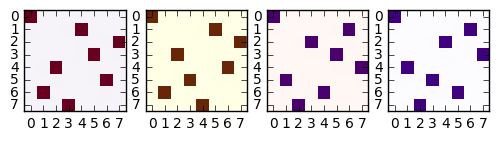

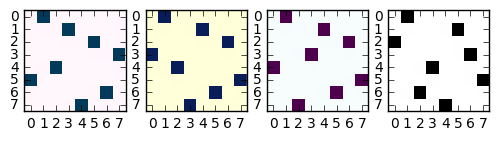

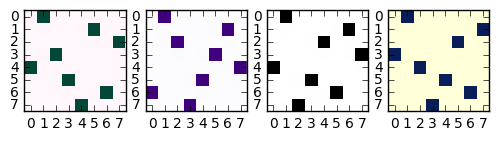

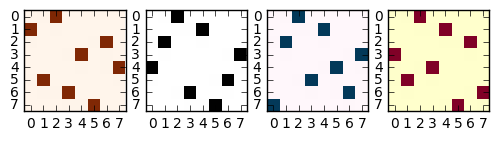

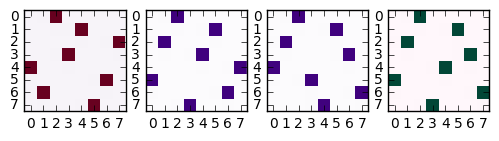

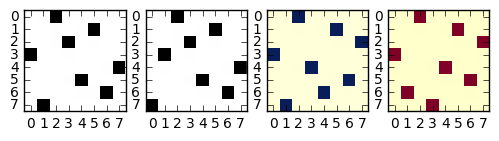

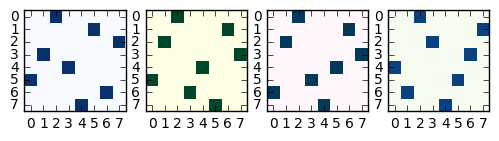

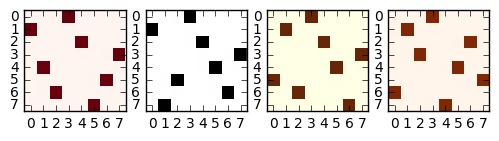

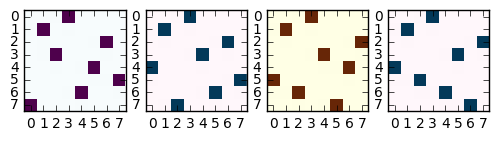

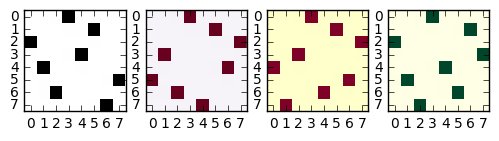

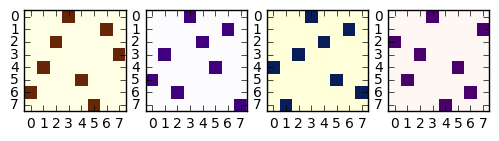

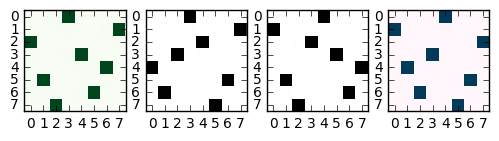

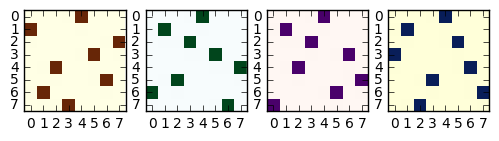

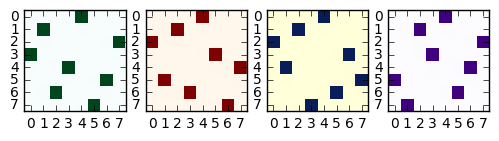

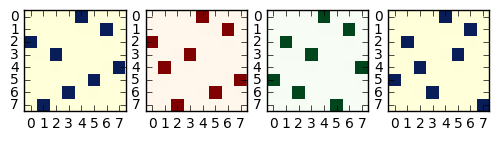

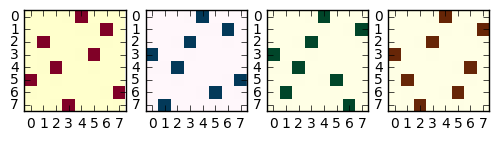

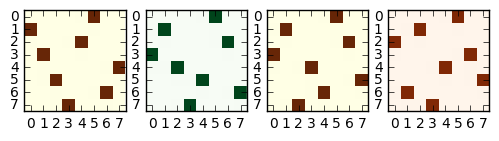

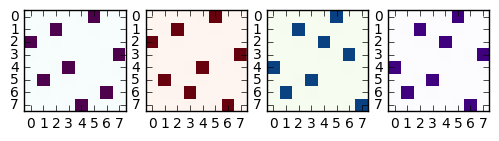

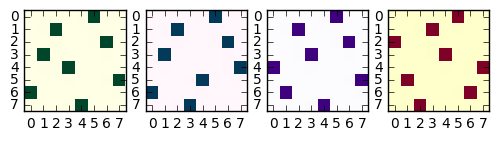

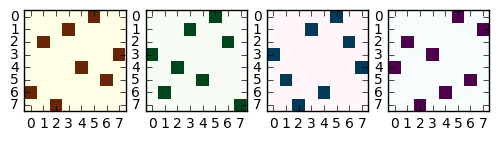

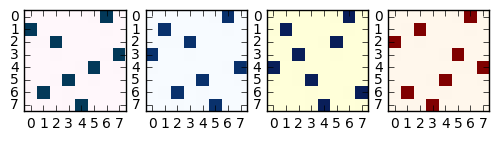

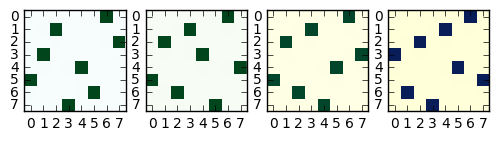

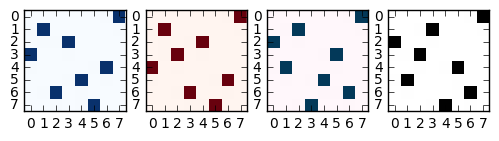

In [175]:
print 'showing 4 out of 92 of possible confi'
cmaps =  ['Blues', 'BuGn', 'BuPu', 'gist_yarg',\
         'GnBu', 'Greens', 'Greys', 'Oranges', 'OrRd',\
         'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdPu',\
         'Reds', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd']


for i in range(0,len(ans),4):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)  
    ax1.imshow(ans[i],interpolation='none',cmap=cmaps[random.randint(0,len(cmaps)-1)]) 
    ax2.imshow(ans[i+1],interpolation='none',cmap=cmaps[random.randint(0,len(cmaps)-1)]) 
    ax3.imshow(ans[i+2],interpolation='none',cmap=cmaps[random.randint(0,len(cmaps)-1)]) 
    ax4.imshow(ans[i+3],interpolation='none',cmap=cmaps[random.randint(0,len(cmaps)-1)]) 
    plt.show()

## 8.13 stack a stack of boxes from small to large so that the total height is maximized

In [35]:
import random
box = set()
for i in range(20):
    h = random.randint(1,100)
    w = random.randint(1,100)
    d = random.randint(1,100)
    box.add((w,d, h))

In [37]:
stack =[]
memo = [0]
found_stack = []
import copy

def _tupleCompare(t1,t2):
    (a1,a2,a3) = t1
    (b1,b2,b3) = t2
    if a1 < b1 and a2 < b2 and a3 < b3:
        return True
    return False

def stackBoxes(box, stack_pass, memo, found_stack):
    
    
    stack = copy.copy(stack_pass)
    flag = 0
    for b in box: 
        if len(stack)!=0 and _tupleCompare(b, stack[-1]):
            flag = 1
            stackBoxes(box, stack + [b], memo, found_stack)
        if len(stack)==0:
            flag = 1
            stackBoxes(box, stack + [b], memo, found_stack)
                    
    if flag == 0:
        heigh = 0
        for s in stack:
            (w,d,h) = s
            heigh += h
        if heigh > memo[0]:
            memo[0] = heigh 
            for i in range(len(found_stack)):
                found_stack[i] = stack_pass[i] 
            for i in range(len(found_stack), len(stack_pass)):
                found_stack.append(stack_pass[i])      

print 'the boxes are (width, depth, height)'
box

the boxes are (width, depth, height)


{(2, 6, 1),
 (12, 25, 54),
 (20, 62, 63),
 (32, 74, 14),
 (44, 100, 66),
 (45, 84, 73),
 (47, 15, 86),
 (47, 71, 29),
 (48, 83, 97),
 (50, 24, 5),
 (50, 84, 62),
 (58, 38, 65),
 (66, 44, 83),
 (76, 71, 5),
 (79, 67, 60),
 (82, 15, 41),
 (94, 32, 92),
 (97, 79, 22),
 (98, 16, 20),
 (100, 20, 69)}

In [38]:
stackBoxes(box, stack, memo, found_stack)
print 'the max height is',memo[0]
print 'the stack of boxes:',found_stack

the max height is 215
the stack of boxes: [(48, 83, 97), (20, 62, 63), (12, 25, 54), (2, 6, 1)]


## 8.14 boolean evaluation

In [51]:
def countEval(exp, boo) :
    if len(exp)==1 or len(exp)==3:
        if eval(exp)==boo:
            return 1
        else:
            return 0
    count = 0
    for i in range(1,len(exp),2):
        left = exp[:i]
        op = exp[i]
        right = exp[i+1:] 
        
        if op == '&':
            if boo == True:
                count += countEval(left, True) * countEval(right, True)
            else:
                count += countEval(left, False) * countEval(right, True) + \
                            countEval(left, True) * countEval(right, False) +\
                    countEval(left, False) * countEval(right, False) 
                    
        if op == '|':
            if boo == False:
                count += countEval(left, False) * countEval(right, False)
            else:
                count += countEval(left, True) * countEval(right, True) +\
                        countEval(left, True) * countEval(right, False)+\
                        countEval(left, False) * countEval(right, True)
        
        if op == '^':
            if boo == True:
                count += countEval(left, False) * countEval(right, True) +\
                       countEval(left, True) * countEval(right, False)
            else:
                count += countEval(left, True) * countEval(right, True) +\
                        countEval(left, False) * countEval(right, False)
    
    return count

In [52]:
exp = '1^0|0|1'
print countEval(exp, False)


2


In [53]:
exp = '0&0&0&1^1|0'
print countEval(exp, True)

10
